<a href="https://colab.research.google.com/github/kevinegan31/Udemy_Machnine_Learning_A-Z/blob/main/Python/Reinforcement_Learning/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [26]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [29]:
dataset.shape[0]

10000


## Implementing UCB

In [30]:
import math
N = dataset.shape[0] # number of users
d = dataset.shape[1] # number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt((3/2) * (math.log(n + 1) / numbers_of_selections[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400 # set upper bound near infinity
    if upper_bound > max_upper_bound: # if the upper bound is greater than the max upper bound
      max_upper_bound = upper_bound # update max upper bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
  

## Visualising the results

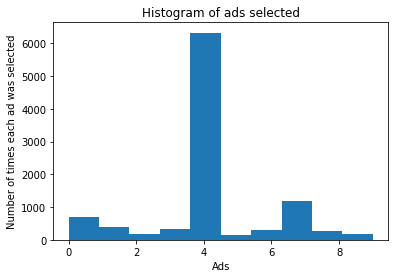

In [31]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()